In [ ]:
import random
random.seed(0)
import numpy as np
np.random.seed(0)
import tensorflow as tf
tf.random.set_seed(0)

In [ ]:
import os
from zipfile import ZipFile
from PIL import Image
import json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [ ]:
kaggle = json.load(open("kaggle.json"))

In [ ]:
os.environ['KAGGLE_USERNAME'] = kaggle['username']
os.environ['KAGGLE_KEY'] = kaggle['key']

In [ ]:
!kaggle datasets download -d ahemateja19bec1025/traffic-sign-dataset-classification

 97% 185M/190M [00:09<00:00, 23.2MB/s]
100% 190M/190M [00:09<00:00, 19.9MB/s]


In [ ]:
!ls

kaggle.json  sample_data  traffic-sign-dataset-classification.zip


In [ ]:
with ZipFile('traffic-sign-dataset-classification.zip', 'r') as zip_ref:
  zip_ref.extractall()

In [ ]:
print(len(os.listdir('traffic_Data/DATA')))

58


In [ ]:
dir = 'traffic_Data/DATA'

(155, 155, 3)


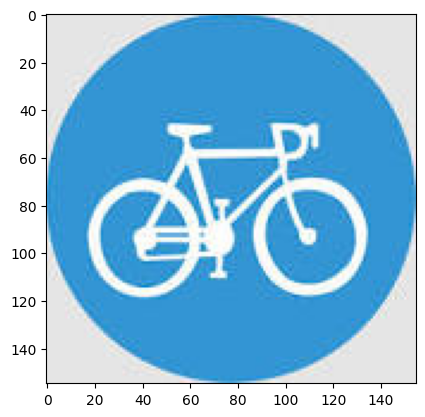

In [ ]:
img = mpimg.imread('/content/cycle.jpeg')
print(img.shape)
plt.imshow(img)

In [ ]:
from PIL import Image
import os
dataset_path = "traffic_Data/DATA"

target_size = (256, 256)

def resize_images(directory_path):
    for file in os.listdir(directory_path):
        file_path = os.path.join(directory_path, file)

        if os.path.isfile(file_path) and file.lower().endswith(('.jpg', '.jpeg', '.png')):
            img = Image.open(file_path)
            resized_img = img.resize(target_size, Image.ANTIALIAS)

            resized_img.save(file_path)

for subdirectory in os.listdir(dataset_path):
    subdirectory_path = os.path.join(dataset_path, subdirectory)

    if os.path.isdir(subdirectory_path):
        resize_images(subdirectory_path)



<ipython-input-23-b74e6815be3a>:13: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_img = img.resize(target_size, Image.ANTIALIAS)


In [ ]:
data_gen = ImageDataGenerator(rescale = 1./255, validation_split = 0.2)

In [ ]:
train_gen = data_gen.flow_from_directory(dir, target_size = (224,224), batch_size = 16, subset= 'training', class_mode = 'categorical')

Found 3359 images belonging to 58 classes.


In [ ]:
val_gen = data_gen.flow_from_directory(dir, target_size = (224,224), batch_size = 16, subset= 'validation', class_mode = 'categorical')

Found 810 images belonging to 58 classes.


In [ ]:
from tensorflow.keras import models, layers

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(32, activation='relu'))

model.add(layers.Dense(16, activation='relu'))

model.add(layers.Dense(8, activation='relu'))

model.add(layers.Dense(train_gen.num_classes, activation='softmax'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [ ]:
model.compile(optimizer  = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [ ]:
# I ran this with 60 once and 20 again to improve accuracy
hist = model.fit(train_gen, steps_per_epoch = train_gen.samples/16 , epochs= 20, validation_data = val_gen , validation_steps  = val_gen.samples//16  )

Epoch 1/20
209/209 [==============================] - 17s 82ms/step - loss: 0.3263 - accuracy: 0.9021 - val_loss: 0.2495 - val_accuracy: 0.9262
Epoch 2/20
209/209 [==============================] - 19s 92ms/step - loss: 0.3241 - accuracy: 0.9035 - val_loss: 0.2455 - val_accuracy: 0.9237
Epoch 3/20
209/209 [==============================] - 19s 93ms/step - loss: 0.3818 - accuracy: 0.8952 - val_loss: 0.2267 - val_accuracy: 0.9300
Epoch 4/20
209/209 [==============================] - 18s 84ms/step - loss: 0.3419 - accuracy: 0.9021 - val_loss: 0.2288 - val_accuracy: 0.9350
Epoch 5/20
209/209 [==============================] - 20s 93ms/step - loss: 0.2745 - accuracy: 0.9184 - val_loss: 0.2299 - val_accuracy: 0.9325
Epoch 6/20
209/209 [==============================] - 20s 97ms/step - loss: 0.2820 - accuracy: 0.9163 - val_loss: 0.2100 - val_accuracy: 0.9350
Epoch 7/20
209/209 [==============================] - 17s 82ms/step - loss: 0.3146 - accuracy: 0.9131 - val_loss: 0.2189 - val_accuracy:

In [ ]:
val_loss, val_accuracy = model.evaluate(val_gen, steps=val_gen.samples // 16)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

50/50 [==============================] - 3s 65ms/step - loss: 0.1712 - accuracy: 0.9488
Validation Accuracy: 94.88%


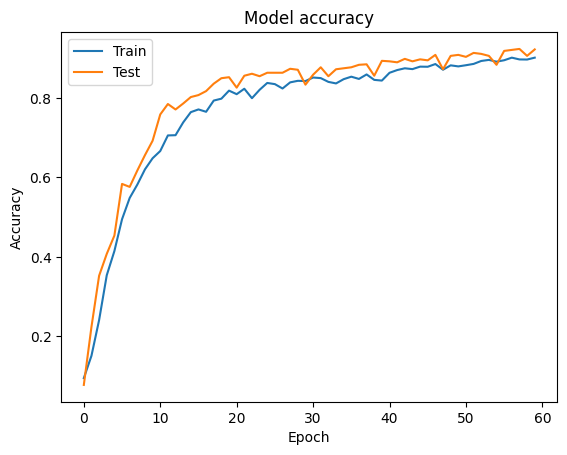

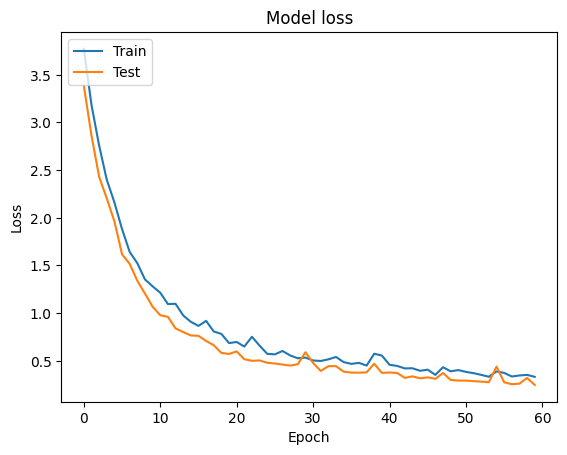

In [ ]:

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    img = Image.open(image_path)
    img = img.resize(target_size)
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array.astype('float32') / 255.
    return img_array

def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [ ]:
class_indices = {v: k for k, v in train_gen.class_indices.items()}

In [ ]:
class_indices

{0: '0',
 1: '1',
 2: '10',
 3: '11',
 4: '12',
 5: '13',
 6: '14',
 7: '15',
 8: '16',
 9: '17',
 10: '18',
 11: '19',
 12: '2',
 13: '20',
 14: '21',
 15: '22',
 16: '23',
 17: '24',
 18: '25',
 19: '26',
 20: '27',
 21: '28',
 22: '29',
 23: '3',
 24: '30',
 25: '31',
 26: '32',
 27: '33',
 28: '34',
 29: '35',
 30: '36',
 31: '37',
 32: '38',
 33: '39',
 34: '4',
 35: '40',
 36: '41',
 37: '42',
 38: '43',
 39: '44',
 40: '45',
 41: '46',
 42: '47',
 43: '48',
 44: '49',
 45: '5',
 46: '50',
 47: '51',
 48: '52',
 49: '53',
 50: '54',
 51: '55',
 52: '56',
 53: '57',
 54: '6',
 55: '7',
 56: '8',
 57: '9'}

In [ ]:
json.dump(class_indices, open('class_indices.json', 'w'))

In [ ]:
image_path = 'cycle.jpeg'
predicted_class_name = predict_image_class(model, image_path, class_indices)

print("Predicted Class Name:", predicted_class_name)


1/1 [==============================] - 0s 18ms/step
Predicted Class Name: 28


In [ ]:
from tensorflow.keras.models import save_model
model.save('traffic_recognition.h5')
